In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Einlesen der gesäuberten Daten für Exploration und Visualisierung
heart_data = pd.read_csv("../../resources/data_clean/heart_2020_clean.csv")

<h1>Univariate Analyse</h1>
Analyse jeder Variablen einzeln, um ihre Verteilung zu verstehen

In [4]:
print(heart_data.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


<h2>Liegt Herzerkrankung vor?</h2>

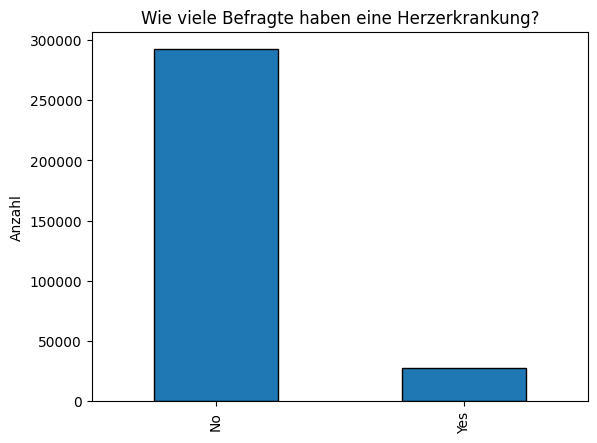

In [5]:
heart_data["HeartDisease"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte haben eine Herzerkrankung?')
plt.show()

<h2>BMI</h2>

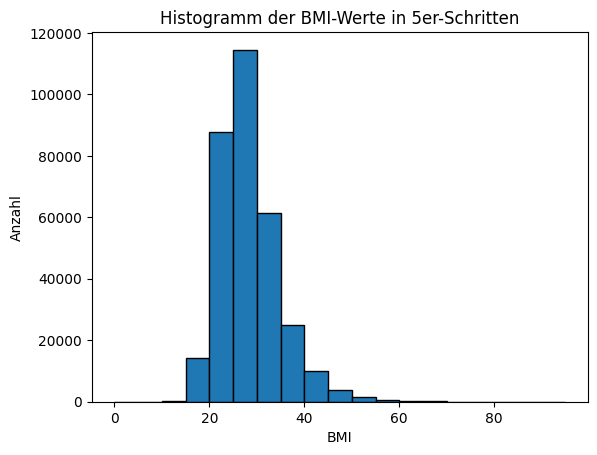

In [6]:
heart_data["BMI"].plot(kind="hist", bins=range(0, int(heart_data["BMI"].max()) + 5, 5), edgecolor='black')

plt.xlabel('BMI')
plt.ylabel('Anzahl')
plt.title('Histogramm der BMI-Werte in 5er-Schritten')
plt.show()


<h2>Rauchen</h2>

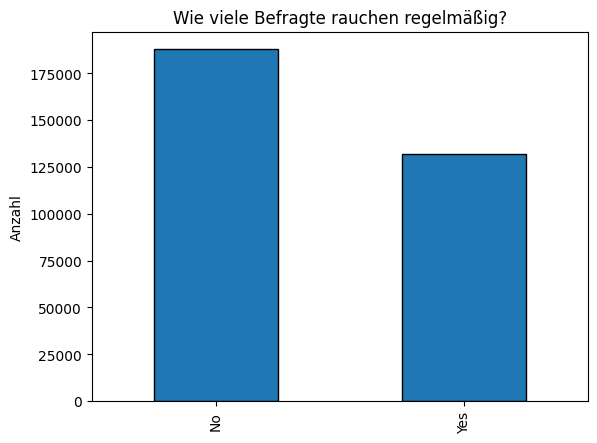

In [7]:
heart_data["Smoking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte rauchen regelmäßig?')
plt.show()

<h2>Alkoholkonsum</h2>

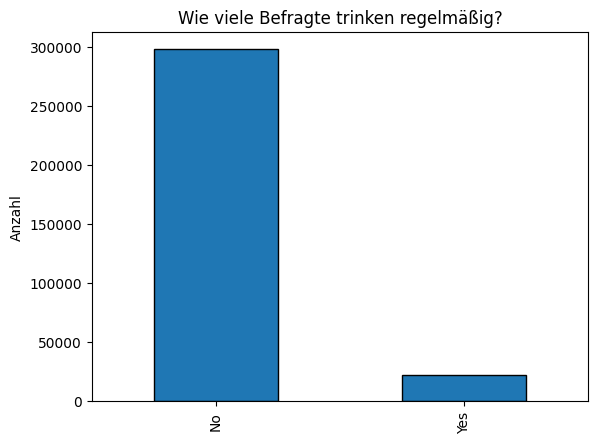

In [8]:
heart_data["AlcoholDrinking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte trinken regelmäßig?')
plt.show()

<h2>Schlaganfall</h2>

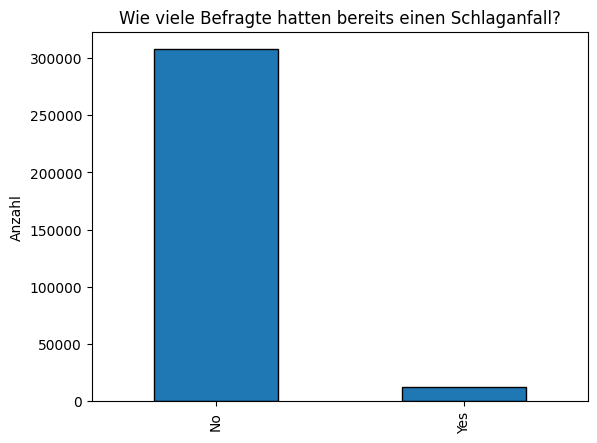

In [9]:
heart_data["Stroke"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte hatten bereits einen Schlaganfall?')
plt.show()

<h2>Physische Gesundheit</h2>

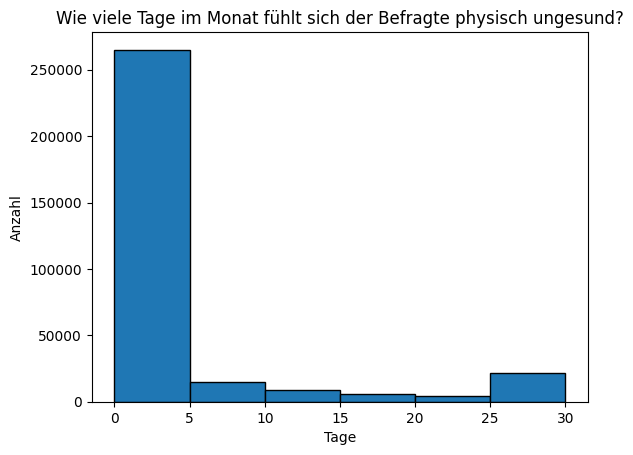

In [10]:
heart_data["PhysicalHealth"].plot(kind="hist", bins=range(0, int(heart_data["PhysicalHealth"].max()) + 5, 5), edgecolor='black')

plt.xlabel('Tage')
plt.ylabel('Anzahl')
plt.title('Wie viele Tage im Monat fühlt sich der Befragte physisch ungesund?')
plt.show()

<h2>Mentale Gesundheit</h2>

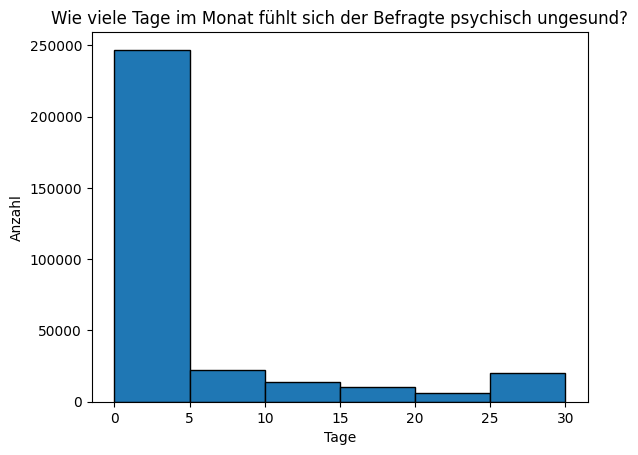

In [11]:
heart_data["MentalHealth"].plot(kind="hist", bins=range(0, int(heart_data["MentalHealth"].max()) + 5, 5), edgecolor='black')

plt.xlabel('Tage')
plt.ylabel('Anzahl')
plt.title('Wie viele Tage im Monat fühlt sich der Befragte psychisch ungesund?')
plt.show()

<h2>Treppensteigen</h2>

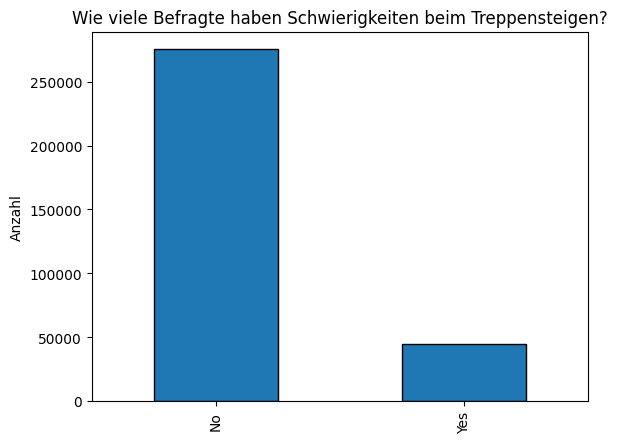

In [12]:
heart_data["DiffWalking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte haben Schwierigkeiten beim Treppensteigen?')
plt.show()

<h2>Geschlecht</h2>

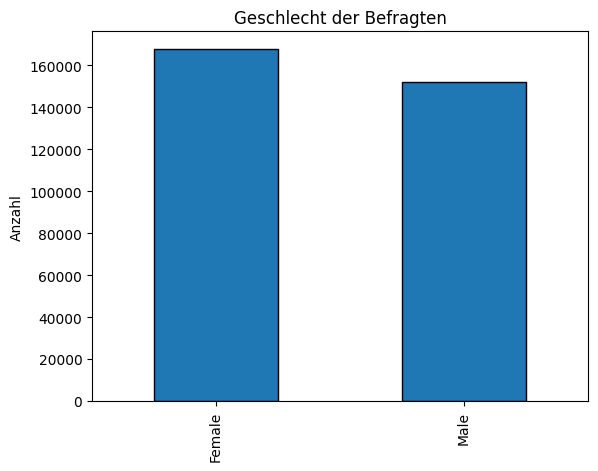

In [13]:
heart_data["Sex"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Geschlecht der Befragten')
plt.show()

<h2>Altersgruppen</h2>

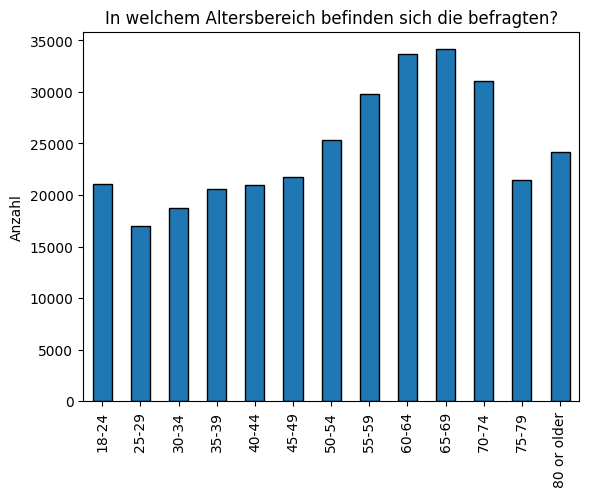

In [14]:
heart_data["AgeCategory"].value_counts().sort_index().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('In welchem Altersbereich befinden sich die befragten?')
plt.show()

<h2>Ethnie</h2>

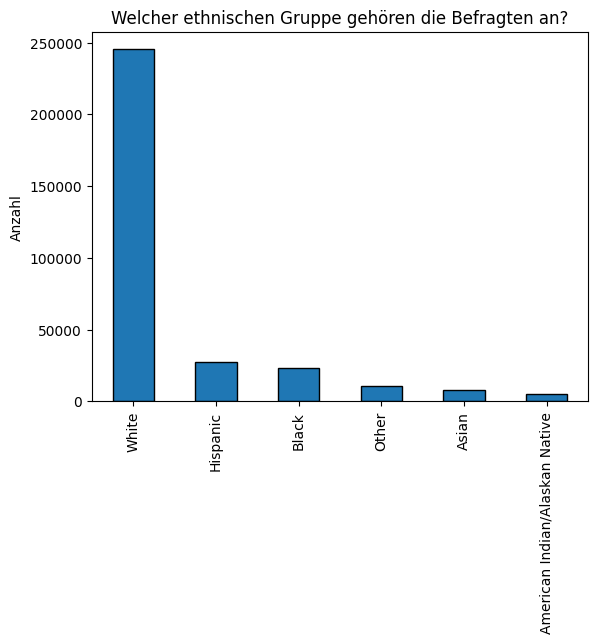

In [15]:
heart_data["Race"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Welcher ethnischen Gruppe gehören die Befragten an?')
plt.show()

<h2>Diabetes</h2>

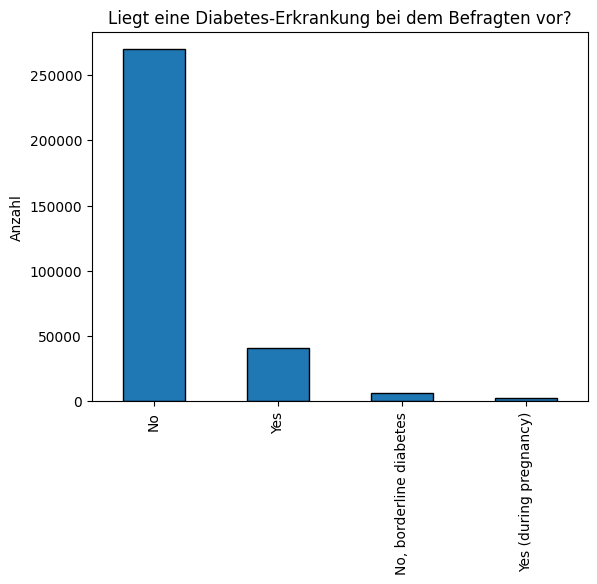

In [16]:
heart_data["Diabetic"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt eine Diabetes-Erkrankung bei dem Befragten vor?')
plt.show()

<h2>Physische Aktivität</h2>

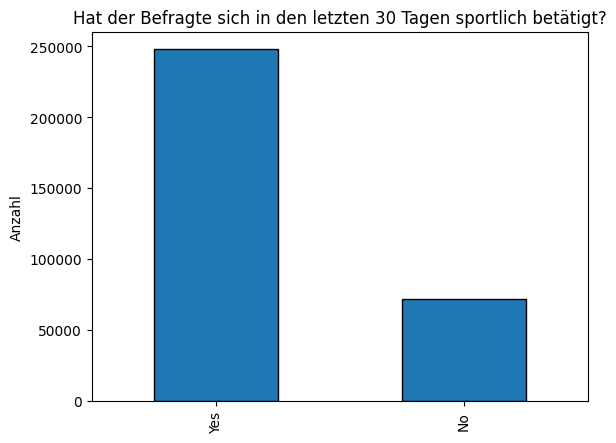

In [17]:
heart_data["PhysicalActivity"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Hat der Befragte sich in den letzten 30 Tagen sportlich betätigt?')
plt.show()

<h2>Generelle Gesundheit</h2>

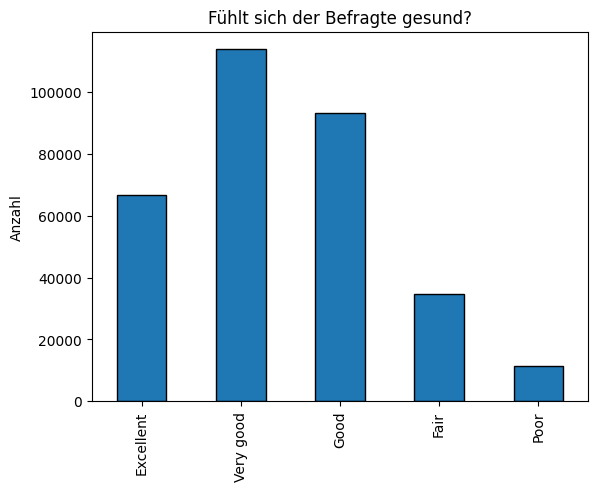

In [18]:
heart_data["GenHealth"].value_counts().reindex(['Excellent', 'Very good', 'Good', 'Fair', 'Poor']).plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Fühlt sich der Befragte gesund?')
plt.show()

<h2>Schlafdauer</h2>

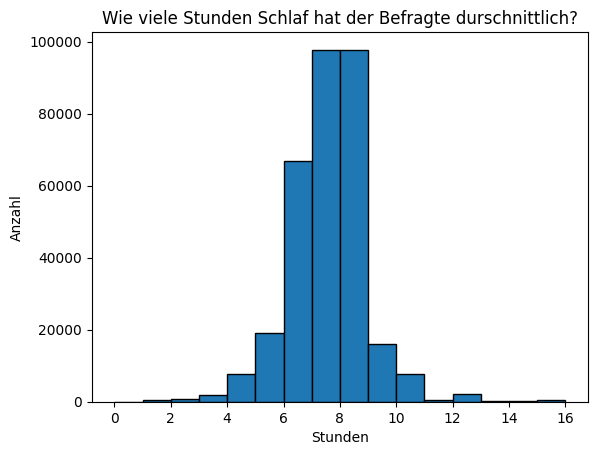

In [19]:
Q1 = np.percentile(heart_data["SleepTime"], 1)
Q2 = np.percentile(heart_data["SleepTime"], 50)
Q3 = np.percentile(heart_data["SleepTime"], 99.9)

heart_data_filtered = heart_data[heart_data["SleepTime"] <= Q3]
heart_data_filtered["SleepTime"].plot(kind="hist", bins=range(0, int(heart_data_filtered["SleepTime"].max()) + 1, 1), edgecolor='black')
del heart_data_filtered, Q1, Q2, Q3

plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Wie viele Stunden Schlaf hat der Befragte durschnittlich?')
plt.show()

Der Datensatz für den Schlaf wurde angepasst, da Werte über 24h Stunden in der Befragung angegeben wurden. Demnach wurde alles ab dem 99,9 Percentil entfernt, um den Graphen anschaulicher zu machen

<h2>Asthma</h2>

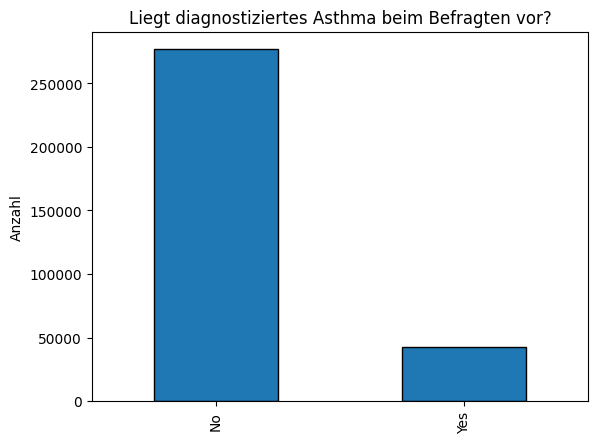

In [20]:
heart_data["Asthma"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt diagnostiziertes Asthma beim Befragten vor?')
plt.show()

<h2>Nieren-Erkrankung</h2>

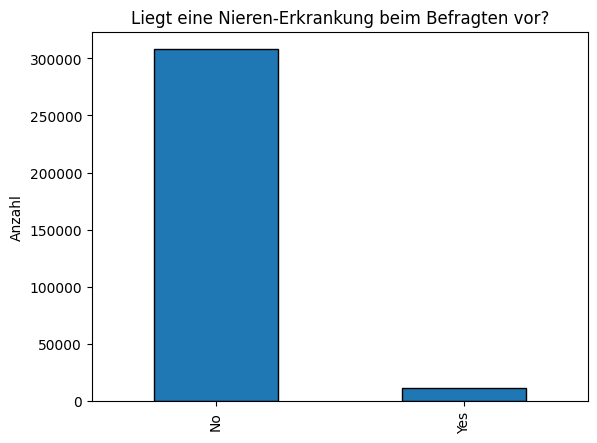

In [21]:
heart_data["KidneyDisease"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt eine Nieren-Erkrankung beim Befragten vor?')
plt.show()

<h2>Hautkrebs</h2>

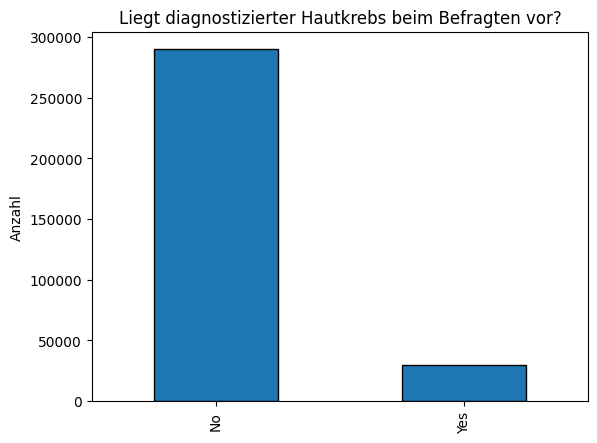

In [22]:
heart_data["SkinCancer"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt diagnostizierter Hautkrebs beim Befragten vor?')
plt.show()

<h1>Bivariate Analyse</h1>
Beziehungen zwischen Variablen-Paaren, Muster oder Korrelationen identifizieren

<h2>Heatmap: Physische und Psychische Gesundheit</h2>

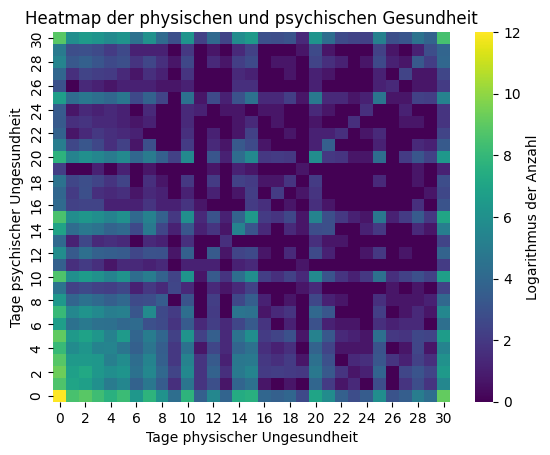

In [31]:
pivot_table = heart_data.pivot_table(index='MentalHealth', columns='PhysicalHealth', aggfunc='size', fill_value=0)

#Logartihmus darauf angewandt, dass die Darstellung besser erkennbar ist. Ohne diesen, sieht man nur Gelb unten Links und sonst ist alles dunkel
pivot_table = np.log1p(pivot_table)

sns.heatmap(pivot_table, cmap="viridis", cbar_kws={'label': 'Logarithmus der Anzahl'})
plt.ylim(0, len(pivot_table))
del pivot_table
plt.title('Heatmap der physischen und psychischen Gesundheit')
plt.xlabel("Tage physischer Ungesundheit")
plt.ylabel("Tage psychischer Ungesundheit")
plt.show()


<h2>Bar-Plot: Herz-Erkrankung und Altersgruppe</h2>

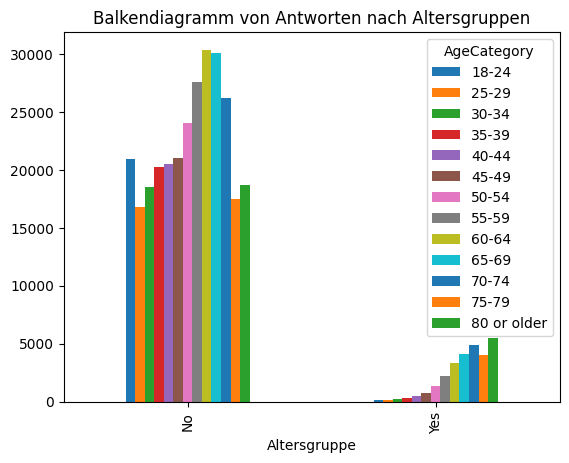

In [33]:
pivot_table = heart_data.pivot_table(index='HeartDisease', columns='AgeCategory', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar')
plt.title('Balkendiagramm von Antworten nach Altersgruppen')
plt.xlabel('Altersgruppe')
plt.show()

<h2>Mosaic-Plot: Herz-Erkrankung nach Altersgruppen</h2>

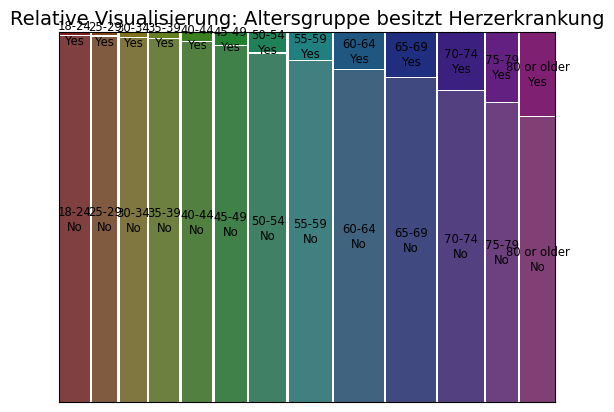

In [25]:
age_category_order =pd.Categorical(["18-24","25-29","30-34","35-39","40-44",
                                    "45-49","50-54","55-59","60-64","65-69",
                                    "70-74","75-79","80 or older"], ordered=True)

heart_data['AgeCategory'] = pd.Categorical(heart_data['AgeCategory'], categories=age_category_order, ordered=True)
heart_data.sort_values("AgeCategory", inplace=True)

colors = [cm.tab20(i/float(19)) for i in range(20)]


mosaic(heart_data, ['AgeCategory', 'HeartDisease'], axes_label=False)


plt.title('Relative Visualisierung: Altersgruppe besitzt Herzerkrankung', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)

plt.show()

<h2>Stacked Bar-Plot: Herz-Erkrankung nach Geschlecht</h2>

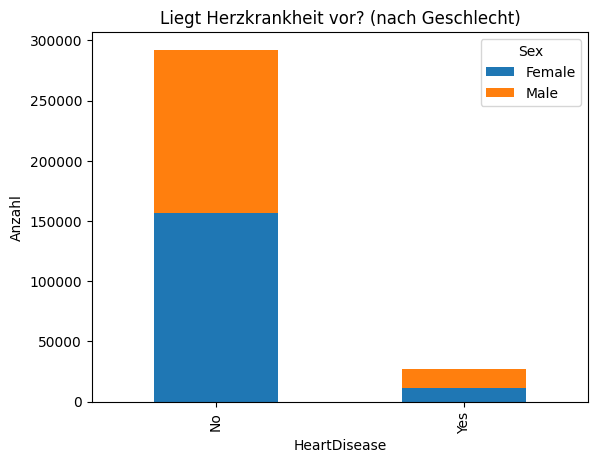

In [26]:
#Scatter Plot Geschlecht und Herzerkrankung
pivot_table = heart_data.pivot_table(index='HeartDisease', columns='Sex', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True)
plt.title('Liegt Herzkrankheit vor? (nach Geschlecht)')
plt.ylabel('Anzahl')
plt.show()

<h1>Multivariate Analyse</h1>
Wechselwirkungen zwischen mehreren Variablen gleichzeitig erkennen

<h2>Verteilung von Herzkrankheiten nach Altersgruppen und Geschlecht</h2>

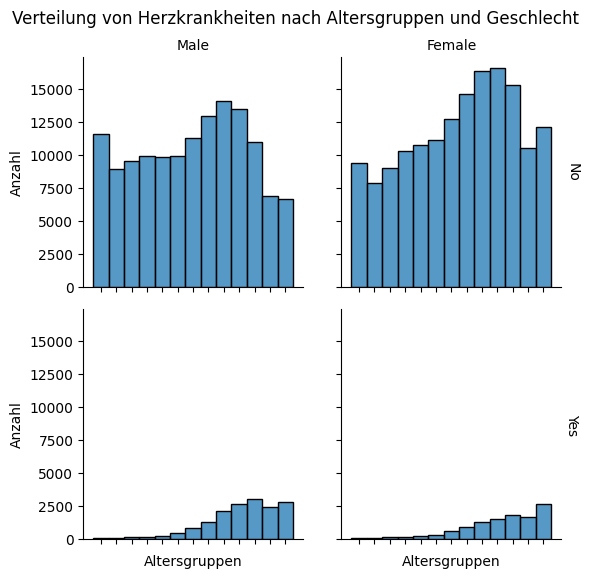

In [27]:
age_category_order = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]
heart_data['AgeCategory'] = pd.Categorical(heart_data['AgeCategory'], categories=age_category_order, ordered=True)

g = sns.FacetGrid(heart_data, col="Sex", row="HeartDisease", margin_titles=True)
g.map_dataframe(sns.histplot, x="AgeCategory", discrete=True)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels("Altersgruppen", "Anzahl")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Verteilung von Herzkrankheiten nach Altersgruppen und Geschlecht')
plt.show()

<h2>Graph, der eher nutzlos ist</h2>

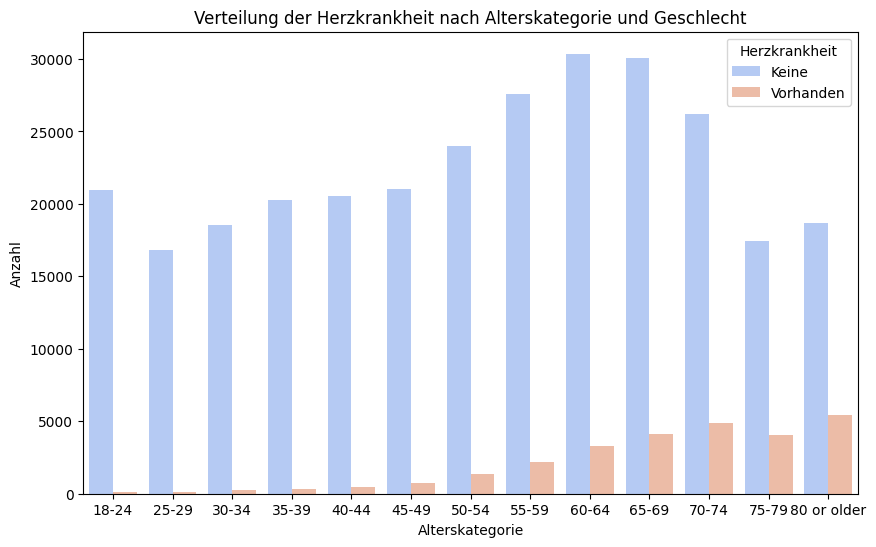

In [28]:
age_category_order = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]
heart_data['AgeCategory'] = pd.Categorical(heart_data['AgeCategory'], categories=age_category_order, ordered=True)

# Pivot-Tabelle erstellen
pivot_table = heart_data.pivot_table(index='AgeCategory', columns='Sex', values='HeartDisease', aggfunc="size")

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=heart_data, palette='coolwarm', dodge=True)
plt.title('Verteilung der Herzkrankheit nach Alterskategorie und Geschlecht')
plt.xlabel('Alterskategorie')
plt.ylabel('Anzahl')
plt.legend(title='Herzkrankheit', labels=['Keine', 'Vorhanden'])
plt.show()
# Eher unnötig der gesamte Graph

<h1>Statistik und Mathematik</h1>

Hier vielleicht irgendwie eine logistische Regression einbauen, aber keine Ahnung wie.

Wollte das mit AgeCategory und HeartDisease machen, habe es aber nicht geschafft.

<h2>Logistische Regression</h2>

In [35]:
heart_data_copy = heart_data.copy()

# Mapping der Alterskategorien auf Zahlen von 1-13
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}
heart_data_copy['AgeCategory'] = heart_data['AgeCategory'].map(age_mapping)

# Zielvariable in binäre Werte umwandeln
heart_data_copy['HeartDisease'] = heart_data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Merkmale (X) und Zielvariable (y) definieren
X = heart_data_copy[['AgeCategory']]
y = heart_data_copy['HeartDisease']

# Daten in Trainings- und Testdatensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistische Regression trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test)

# Ergebnisse auswerten
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print("Genauigkeit:", accuracy)
print("Konfusionsmatrix:\n", conf_matrix)
print("Klassifikationsbericht:\n", class_report)

# Einzelwert testen
# Beispiel: Ein 55-jähriger Patient
single_test_value = pd.DataFrame({'AgeCategory': [age_mapping['25-29']]})

# Vorhersage für den Einzelwert
single_prediction = model.predict(single_test_value)
single_prediction_proba = model.predict_proba(single_test_value)

print("Vorhersage für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit):", single_prediction[0])
print("Wahrscheinlichkeiten für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit):", single_prediction_proba[0])

Genauigkeit: 0.9144451914507732
Konfusionsmatrix:
 [[58487     0]
 [ 5472     0]]
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     58487
           1       1.00      0.00      0.00      5472

    accuracy                           0.91     63959
   macro avg       0.96      0.50      0.48     63959
weighted avg       0.92      0.91      0.87     63959

Vorhersage für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit): 0
Wahrscheinlichkeiten für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit): [0.98888787 0.01111213]


Text(0.5, 427.9555555555555, 'Predicted label')

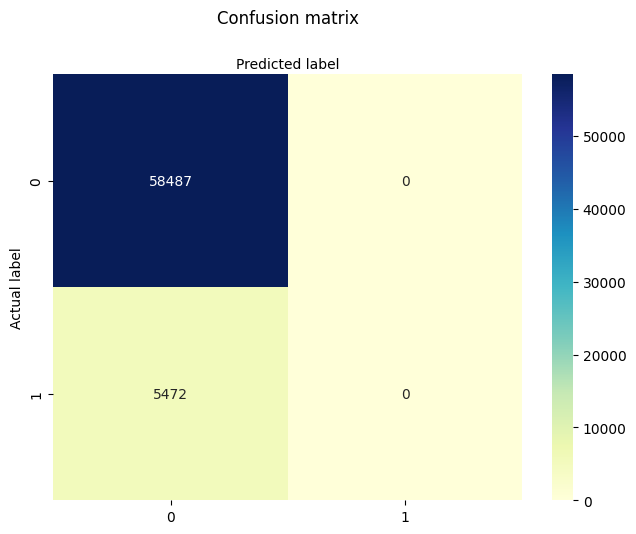

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')